In [ ]:
#Implementing neural networks with Keras and TensorFlow for Image Classification Problem a. Import the necessary packages b. Load the training and testing data (FASION MNIST) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
# import dataset and split into training and testing data
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# print length of training data
len(x_train)

60000

In [ ]:
# print length of testing data
len(x_test)

10000

In [ ]:
# print shape of training data
x_train.shape

(60000, 28, 28)

In [ ]:
# print shape of testing data
x_test.shape

(10000, 28, 28)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

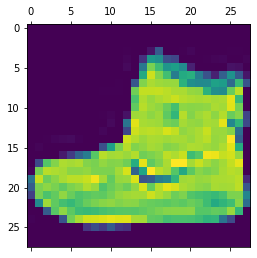

In [ ]:
plt.matshow(x_train[0])

In [ ]:
# normalize the images
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# print x_train[0] after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

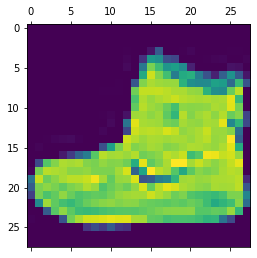

In [ ]:
plt.matshow(x_train[0])

In [ ]:
# Creating the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7516 - accuracy: 0.7494 - val_loss: 0.5787 - val_accuracy: 0.7998
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5160 - accuracy: 0.8226 - val_loss: 0.5227 - val_accuracy: 0.8190
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4688 - accuracy: 0.8369 - val_loss: 0.5003 - val_accuracy: 0.8194
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4429 - accuracy: 0.8458 - val_loss: 0.4748 - val_accuracy: 0.8314
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4254 - accuracy: 0.8533 - val_loss: 0.4435 - val_accuracy: 0.8420
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4112 - accuracy: 0.8571 - val_loss: 0.4338 - val_accuracy: 0.8487
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3993 - accuracy: 0.8609 - val_loss: 0.4375 - val_accuracy:

In [ ]:
# printing accuracy and loss by evaluating model on testing data
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:%.3f' %test_loss)
print('Test acc:%.3f' %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8549
Test loss:0.411
Test acc:0.855


In [ ]:
# for plotting graph
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

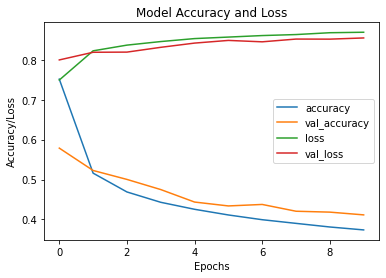

In [ ]:
# Plotting loss and accuracy graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss',], loc='center right')
plt.show()